# K Means Clustering and Gaussian Mixture Modelling
## Implemented on SKLearn's Iris dataset 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import math

In [2]:
class DataIris:
    def __init__(self):
        data = load_iris()
        self.data = data.data[:, [1, 3]]
        self.target = data.target

#  K-means clustering


We will implement K-means clustering with a cluster of reduced form of the Iris dataset with a dimensionality of d=2 found in class `IrisData`


In [3]:
class KMeansClustering:
    def __init__(self, X, K):
        '''
        Params : 
            X : (np.ndarray) of dimension (N, d) N is the number of points
            K : (int) number of means/centroids to evaluate
            epochs : (int) maximum number of epochs to evaluate for the centroids
        '''
        self.X = X
        self.K = K
        self.centroids = self.initialize_centroids()
        
    def initialize_centroids(self):
        '''
        Randomly select K distinct points from the dataset in self.X
        Params : 
            None
        RETURN :
            means : (np.ndarray) of the dimension (K, d)
        '''
        np.random.RandomState(34)
        random_idx = np.random.permutation(self.X.shape[0])
        self.centroids = self.X[random_idx[:self.K]]
        return self.centroids
    
    def distance(self, a, b, ax=1):
        return np.linalg.norm(a - b, axis=ax)
    
    def compute_distances(self):
        '''
        Comupute a distance matrix of size (N, K) where each cell (i, j) represents the distance between 
        i-th point and j-th centroid. We shall use Euclidean distance here.
        
        PARAMS:
            centroids : (np.ndarray) of the dimension (K, d)
        RETURN:
            distance_matrix : (np.ndarray) of the dimension (N, K)
        '''
        distance_matrix = np.zeros((self.X.shape[0], self.K))
        for i in range(len(distance_matrix)):
            for j in range(len(distance_matrix[0])):
                distance_matrix[i][j] = self.distance(self.X[i], self.centroids[j], None)
        return distance_matrix
    
    def compute_cluster_assignment(self, distance_matrix):
        '''
        Given the distance matrix, it returns an array of labels in which each element 
        is an integer in the range [0, K-1] and it represents which centroid in the centroid array self.centroids 
        that point belongs to.
        
        PARAMS:
            distance_matrix : (np.ndarray) of the dimension (N, K)
        RETURN:
            labels : (np.ndarray) of the size (N)
        '''
        
        dist = np.array(distance_matrix)
        labels = np.argmin(dist, axis=1)
        return labels
    
    def compute_centroids(self, labels):
        '''
        Randomly select K distinct points from the dataset in self.X
        Params : 
            labels : (np.ndarray) of the dimension (N) where each i-th item reperesents the closest
            centroid among the K centroids. Each value here must be between 0 and K-1.
        RETURN :
            updated_means : (np.ndarray) of the dimension (K, d)
        '''    
        
        updated_means = np.array([self.X[labels==k].mean(axis=0) for k in range(self.centroids.shape[0])])
        return updated_means
        
        
    def cluster(self, epochs):
        '''
        Implement the K-means algorithm here as described above. However loop for a maximum of self.epochs.
        Ensure that you have a condition that checks whether the epochs have changed since the last epoch or not
        For this use a threshold of change of 0.01.
        
        PARAMS:
            epochs : (integer) maximum number of epochs
        RETURN:
            centroids : (np.ndarray) of the size (K, d) also store in a class variable self.centroids
        '''
        for i in range(epochs):
            distance_matrix = self.compute_distances()
            labels = self.compute_cluster_assignment(distance_matrix)
            new_centroids = self.compute_centroids(labels)
            err = self.distance(self.centroids, new_centroids, None)
            err = err / self.K
            if err <= 0.01:
                break
            self.centroids = new_centroids
            self.show_progress(i)
        return self.centroids, labels
            
    
    def show_progress(self, epoch):
        '''
        PARAMS:
            epoch : (integer) tells which epoch is it
        RETURN:
            None
        '''
        plt.plot(self.X[:, 0], self.X[:, 1], 'o', color='y')
        for i in range(self.K):
            plt.plot(self.centroids[i, 0], self.centroids[i, 1], 'o', color='k')
        plt.title('Centroids at epoch : {}'.format(epoch))
        plt.show()
        
    def elbow_analysis(self, k_range):
        '''
        PARAMS:
            k_range : (list of +ve integers) contains the K number of hyperparameters k to peform 
            the analysis over
        RETURN:
            avg_variance : (list of float) list od size K. contains the average variance of clusters corresponding to each 
            to each hyperparameter k
        '''
        C, avg_variance = [0 for k in range(k_range)], [0 for k in range(k_range)]
        for k in range(1, k_range+1):
            epoch = 1
            while(epoch<=20):
                self.K = k
                self.initialize_centroids()
                curr_centroids = self.centroids
                new_centroids = np.zeros(self.K)
                distance_matrix = self.compute_distances()
                labels = self.compute_cluster_assignment(distance_matrix)
                new_centroids = self.compute_centroids(labels)
                err = self.distance(curr_centroids, new_centroids, None)
                err = err / self.K
                if err <= 0.01:
                    break
                self.centroids = new_centroids
                epoch += 1
                
            var = 0
            for l in range(k_range):
                dist = 0
                withinclustervar = 0
                points = []
                for j in range(len(self.X)):
                    if labels[j] == l:
                        points.append(self.X[j])
                points = np.array(points)
                for m in range(len(points)):
                    dist = self.distance(points[m], new_centroids[l], None)
                    withinclustervar += (dist**2)
                    var += withinclustervar
                    var /=100
            avg_variance[k-1]=(var)/k
        return avg_variance

In [4]:
import unittest

class KMeansTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3], [0.4, 0.6], [0.2, 0.4], [3.1, 3.1], [3.5, 2.9]])
        self.cluster_obj_1 = KMeansClustering(self.X, 2)
        self.cluster_obj_2 = KMeansClustering(self.X, 2)
        self.cluster_obj_3 = KMeansClustering(self.X, 2)
        self.cluster_obj_4 = KMeansClustering(self.X, 2)
        
    def test_initialize_centroids(self):
        """
        Test initialize_centroids function from KMeansClustering
        """
        means = self.cluster_obj_1.initialize_centroids()
        self.assertEqual(means.shape[0], 2)
        self.assertEqual(means.shape[1], 2)
        
    def test_compute_distances(self):
        """
        Test compute_distances function from KMeansClustering
        """
        self.cluster_obj_2.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_2.compute_distances()
        self.assertEqual(round(distance_matrix[0,0], 2), 0.0)
        self.assertEqual(round(distance_matrix[0,1], 2), 0.42)
        
    def tests_compute_cluster_assignment(self):
        """
        Test compute_cluster_assignment function from KMeansClustering
        """
        self.cluster_obj_3.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_3.compute_distances()
        labels = self.cluster_obj_3.compute_cluster_assignment(distance_matrix)
        self.assertEqual(labels[0], 0)
        self.assertEqual(labels[1], 1)
        self.assertEqual(labels[2], 0)
        
    def test_compute_centroids(self):
        """
        Test compute_centroids function from KMeansClustering
        """
        self.cluster_obj_4.centroids = self.X[:2, :]
        distance_matrix = self.cluster_obj_4.compute_distances()
        labels = self.cluster_obj_4.compute_cluster_assignment(distance_matrix)
        new_means = self.cluster_obj_4.compute_centroids(labels)
        self.assertEqual(round(new_means[0, 0], 2), 0.15)
        self.assertEqual(round(new_means[0, 1], 2), 0.35)
        
    
tests = KMeansTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....
----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Let's do K-means clustering on the `IrisData` with `K=3` for up to 20 epochs. The centroid locations at each epoch are plotted.

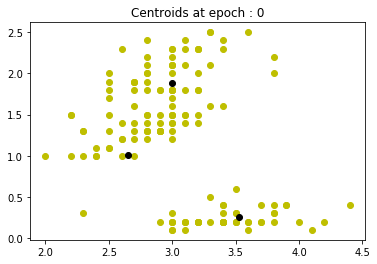

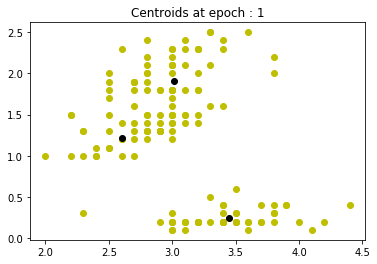

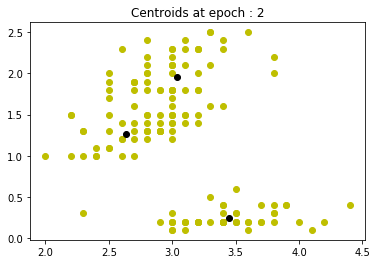

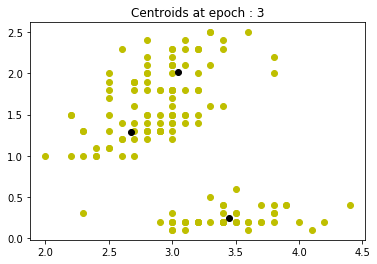

In [5]:
iris = DataIris()
k = 3
model = KMeansClustering(iris.data, k)
centroids, labels = model.cluster(20)

The original Iris dataset was a labelled dataset with classes assigned to each point. The `show_progress` method plots all the points as yellow without giving points of different classes different colors along with the centroids as black points. Now that we have performed clustering, let us try to plot the points in the dataset along with the computed centroids, but this time color the dataset points according to their true label in `IrisData` (see the attribute `target` for true class labels in `IrisData`)

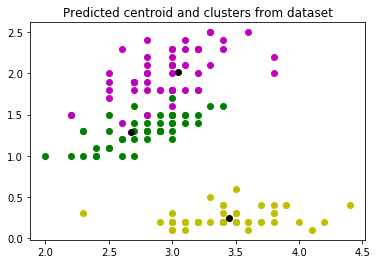

In [6]:
C = [0 for k in range(3)]
for i in range(3):
    points = []
    for j in range(len(iris.data)):
        if iris.target[j] == i:
            points.append(iris.data[j])
    C[i] = points
C = np.array(C)

plt.plot(C[0][:, 0], C[0][:, 1], 'o', color='y')
plt.plot(C[1][:, 0], C[1][:, 1], 'o', color='g')
plt.plot(C[2][:, 0], C[2][:, 1], 'o', color='m')
for i in range(3):
    plt.plot(centroids[i, 0], centroids[i, 1], 'o', color='k')
plt.title("Predicted centroid and clusters from dataset")    
plt.show()

From the green and pink cluster, we can see that there are some outliers i.e we have pink colored points near green cluster's centroid, where we have other green points even farther away from the green's centroid than the outlier pink colored point from the green's centroid and vice versa. The yellow cluster doesn't have any outliers. Thus, we can say that the dataset has outliers. 

But this misclassification doesn't affect the K Means performance since it's an unsupervised algorithm.
When I plotted the predicted clusters along with it's centroids in three different colors (for my reference, not shown here), I could observe perfect clusters with perfect clusters with no misclassification.

## Elbow Analysis

Our Iris dataset should have an expectation of three clusters (as seen in the match to the targets?), but we want to see if that is borne out by an Elbow Test. 

C:\Users\nivetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice.
C:\Users\nivetha\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


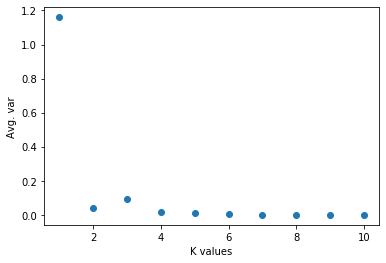

In [7]:
iris = DataIris()
model = KMeansClustering(iris.data, 1)
avg_var = model.elbow_analysis(10)

krange = []
for k in range(1,11):
    krange.append(k)
plt.plot(krange, avg_var, 'o')
plt.xlabel("K values")
plt.ylabel("Avg. var")
plt.show()

Elbow is at K = 2, where we have most change in average within cluster variance.

# 1-D data from Gaussian Distributions

In [8]:
class Data1D:
    def __init__(self):
        self.means = [-4.0, 3.5, 10.6]
        self.variances = [1.5, 1.2, 1.0]
        X = []
        for m, v in zip(self.means, self.variances):
            X += list(np.random.normal(m, np.sqrt(v), size=(100)))
        self.means, self.variances = np.array(self.means), np.array(self.variances)
        X = np.array(X)
        self.X = X

# Gaussian Mixture Model

GMMs are based on the assumption that all data points come from a fine mixture of Gaussian distributions with unknown parameters. They are parametric generative models that attempt to learn the true data distribution. Hence, once we learn the Gaussian parameters, we can generate data from the same distribution as the source. <br>

Like K-Means, GMMs also demand the number of clusters K as an input to the learning algorithm. However, there is a key difference between the two. K-Means can only learn clusters with a circular form. GMMs, on the other hand, can learn clusters with any elliptical shape. <br>

K-Means only allows for an observation to belong to one, and only one cluster. Differently, GMMs give probabilities that relate each example with a given cluster. In other words, GMMs allow for an observation to belong to more than one cluster — with a level of uncertainty. <br>

Assuming one-dimensional data(as is the data for the problem we will solve) and the number of clusters K equals 3, GMMs attempt to learn 9 parameters.
- 3 parameters for the means i.e $\mu_k$
- 3 parameters for the variances i.e $\sigma^2_k$
- 3 scaling parameters $\phi_k$

We estimate these parameters using Expectation Maximization which works as follows:
1. First we calculate the likelihood of each point. Below is the Probability Density Function we will use to evaluate the likelihood
$$f(x|\mu_k, \sigma^2_k) = \frac{1}{\sqrt{2\pi\sigma^2_k}}exp\Big(-\frac{(x-\mu_k)^2}{2\sigma^2_k}\Big)$$

2. Next we estimate the posterior probability of each point with repect to certain cluster. This tells us what is the probability that a certain point belongs to a certain cluster
$$b_k^{(i)} = \frac{f(x^{(i)}|\mu_k, \sigma^2_k)\phi_k}{\sum_{k=1}^{K}f(x^{(i)}|\mu_k, \sigma^2_k)\phi_k}$$

3. Now we estimate the parameters as
$$\mu_k = \frac{\sum_i b_k^{(i)}x^{(i)}}{\sum_i b_k^{(i)}}$$
$$\sigma^2_k = \frac{\sum_i b_k^{(i)}(x^{(i)} - \mu_k)^2}{\sum_i b_k^{(i)}}$$
$$\phi_k = \frac{1}{N}\sum_i b_k^{(i)}$$

4. We repeat the above steps until the parameters dont change beyond a certain threshold or we reach the maximum number of epochs

Now we shall implement Gaussian Mixture Model for a 1-D dataset composed of points from multiple Gaussian Distributions. You can find the data in `Data1D` above.


In [9]:
class GaussianMixtureModel1D:
    def __init__(self, X, K):
        self.X = X
        self.K = K
        self.mean, self.variance, self.weight = self.initialize_parameters()
        
    def initialize_parameters(self):
        mean = np.random.choice(self.X, self.K)
        variance = np.random.random_sample(size=self.K) * 2
        weights = np.ones(self.K) / self.K
        return mean, variance, weights
    
    def compute_pdf(self, x, k):
        '''
        Evaluate the p.d.f value for 1-D point i.e scalar value for the w.r.t to the k-th cluster
        Params : 
            x : (float) the point
            k : (integer) the k-th elements from mean, variance and weights correspond to k-th cluster parameters.
                Use those to estimate your result.
        RETURN :
            result : (float) evalutated using the formula described above
        '''
        val1 = 1/(np.sqrt(2*np.pi*self.variance[k]))
        val2 = np.exp(-(np.square(x - self.mean[k]))/(2*self.variance[k]))
        f = val1 * val2
        return f
        
    def compute_pdf_matrix(self):
        '''
        Evaluate the p.d.f martix by calling compute_pdf() for each combination of x and k
        Params : 
            None
        RETURN :
            result : (np.array) matrix of size N X K containing p.d.f values
        '''
        pdf_matrix = []
        for j in range(self.K):
            pdf_matrix.append(self.compute_pdf(self.X,j))
        pdf_matrix = np.array(pdf_matrix)
        return (pdf_matrix.transpose())
    
    def compute_posterior(self, pdf_matrix):
        '''
        Evaluate the posterior probability martix as described by the formula above
        Params : 
            pdf_matrix : (np.array) matrix of size N X K containing p.d.f values
        RETURN :
            result : (np.array) matrix of size N X K containing posterior probability values
        '''
        bk = []
        pdf_matrix = pdf_matrix.transpose()
        for j in range(self.K):
            bk.append((pdf_matrix[j] * self.weight[j]) / (np.sum([pdf_matrix[i] * self.weight[i] for i in range(self.K)], axis=0)))
        bk = np.array(bk)
        return (bk.transpose())
    
    def reestimate_params(self, posterior_matrix):
        '''
        Re-estimate the cluster parameters as described by the formulae above and 
        store them in their respective class variables
        Params : 
            posterior_matrix : (np.array) matrix of size N X K containing posterior probability values
        RETURN :
            None
        '''
        mean, variance, weight = [], [], []
        posterior_matrix=posterior_matrix.transpose()
        for j in range(self.K):
            mean.append(np.sum(posterior_matrix[j] * self.X) / (np.sum(posterior_matrix[j])))
            variance.append (np.sum(posterior_matrix[j] * np.square(self.X - mean[j])) / (np.sum(posterior_matrix[j])))
            weight.append(np.mean(posterior_matrix[j]))
          
        self.mean = np.array(mean)
        self.variance =  np.array(variance)
        self.weight = np.array(weight)
            
    def exp_maximize(self, epochs):
        '''
        Peform the expectation-maximization method as dicussed above by calling the functions in their 
        respective sequence. Also plot the progress of the process by calling the plot_progress function
        after every regular interval of epochs.
        Params : 
            epochs : (integer) maximum number of epochs to run the loop for
        RETURN :
            None
        '''
        for i in range(epochs):
            pdf_matrix = self.compute_pdf_matrix()
            bk = self.compute_posterior(pdf_matrix)
            self.reestimate_params(bk)
            if i % 1 == 0:
                self.plot_progress()       
    
    def plot_progress(self):
        points = np.linspace(np.min(self.X),np.max(self.X),500)
        plt.figure(figsize=(10,4))
        plt.xlabel("$x$")
        plt.ylabel("pdf")
        plt.plot(self.X, 0.1*np.ones_like(self.X), 'x', color='navy')
        for k in range(self.K):
            plt.plot(points, [self.compute_pdf(p, k) for p in points])
        plt.show()

In [10]:
import unittest

class GMMTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([0.1, 1.2, 0.3, 0.4, 0.3, 3.5, 2.9])
        self.means = [-2.0, 2.5]
        self.variances = [1.0, 1.3]
        self.weights = [0.1, 0.2]
        
        self.cluster_obj_1 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_1.mean = self.means
        self.cluster_obj_1.variance = self.variances
        self.cluster_obj_1.weight = self.weights
        
        self.cluster_obj_2 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_2.mean = self.means
        self.cluster_obj_2.variance = self.variances
        self.cluster_obj_2.weight = self.weights
        
        self.cluster_obj_3 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_3.mean = self.means
        self.cluster_obj_3.variance = self.variances
        self.cluster_obj_3.weight = self.weights
        
        self.cluster_obj_4 = GaussianMixtureModel1D(self.X, 2)
        self.cluster_obj_4.mean = self.means
        self.cluster_obj_4.variance = self.variances
        self.cluster_obj_4.weight = self.weights
        
    def test_compute_pdf(self):
        """
        Test compute_pdf function from GaussianMixtureModel1D
        """
        pdf = self.cluster_obj_1.compute_pdf(self.X[0], 1)
        self.assertEqual(round(pdf, 3), 0.038)
        
    def test_compute_pdf_matrix(self):
        """
        Test compute_pdf_matrix function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_2.compute_pdf_matrix()
        self.assertEqual(round(pdf_matrix[0,0], 3), 0.044)
        self.assertEqual(round(pdf_matrix[0,1], 3), 0.038)
        
    def tests_compute_posterior(self):
        """
        Test compute_posterior function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_3.compute_pdf_matrix()
        posterior_matrix = self.cluster_obj_3.compute_posterior(pdf_matrix)
        self.assertEqual(round(posterior_matrix[0,0], 2), 0.37)
        self.assertEqual(round(posterior_matrix[0,1], 2), 0.63)
        
    def test_reestimate_params(self):
        """
        Test reestimate_params function from GaussianMixtureModel1D
        """
        pdf_matrix = self.cluster_obj_4.compute_pdf_matrix()
        posterior_matrix = self.cluster_obj_4.compute_posterior(pdf_matrix)
        self.cluster_obj_4.reestimate_params(posterior_matrix)
        self.assertEqual(round(self.cluster_obj_4.mean[0], 2), 0.24)
        self.assertEqual(round(self.cluster_obj_4.variance[0], 2), 0.02)
        self.assertEqual(round(self.cluster_obj_4.weight[0], 2), 0.13)
        
    
tests = GMMTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

....
----------------------------------------------------------------------
Ran 4 tests in 0.010s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Using the Gaussian Mixture Model, let's fit a model for the 1-D data in `Data1D` with K=3. Let's train the model for 20 epochs and plot the progress of the model.

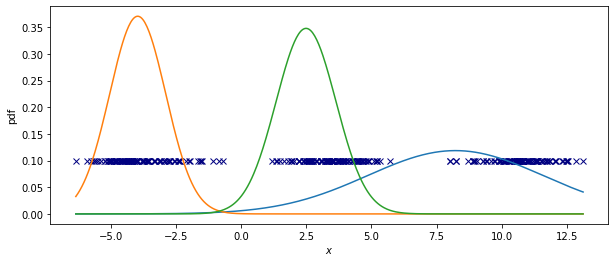

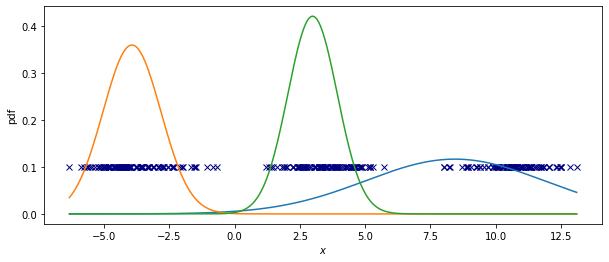

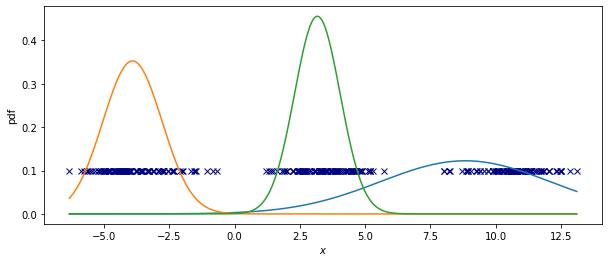

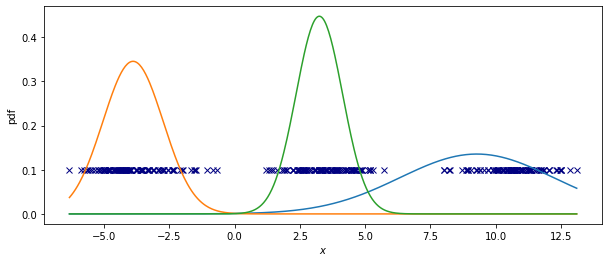

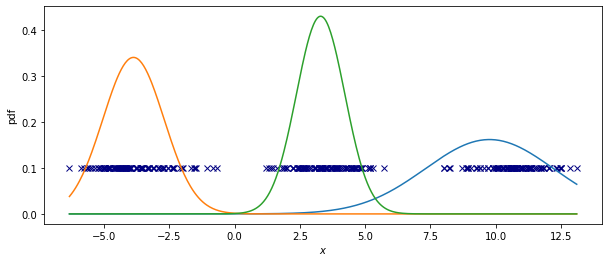

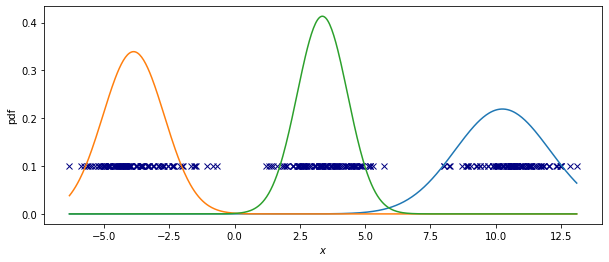

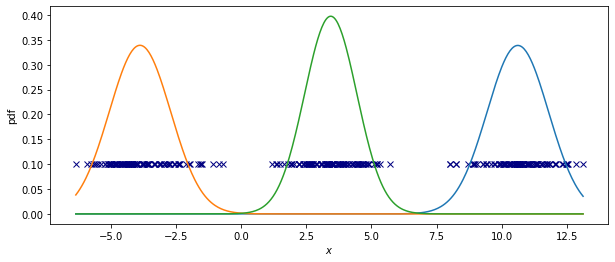

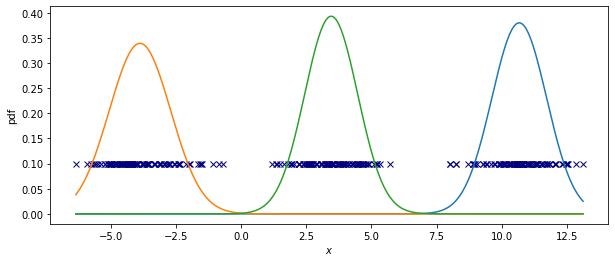

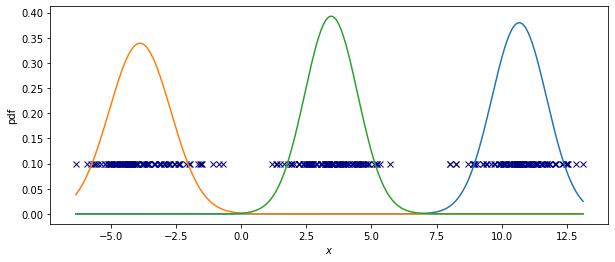

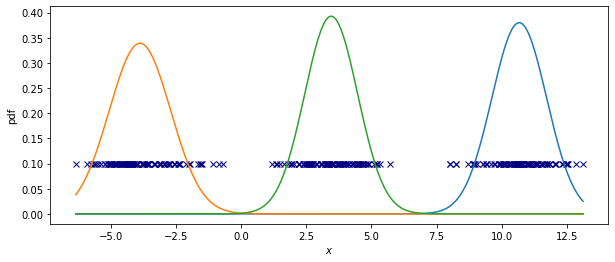

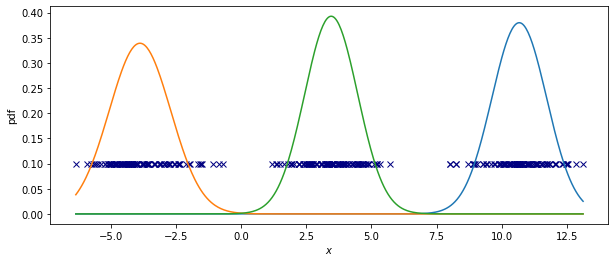

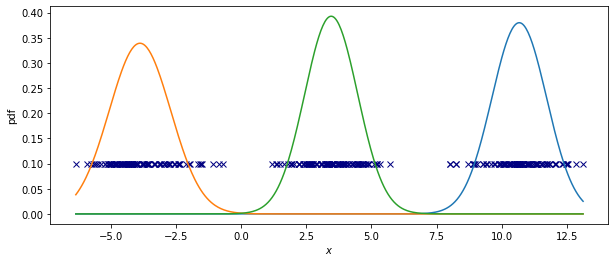

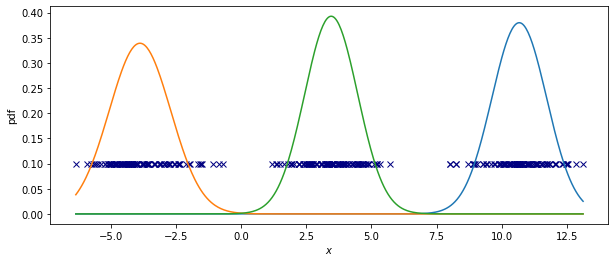

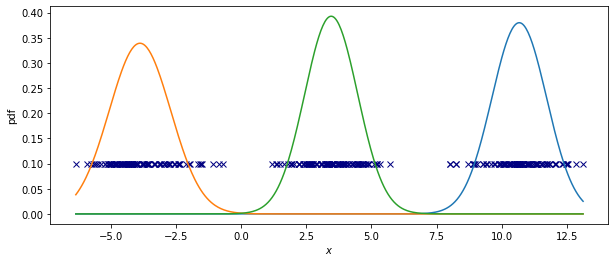

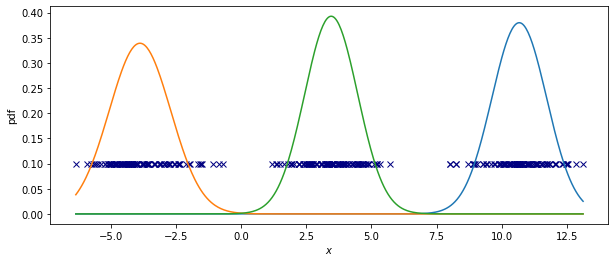

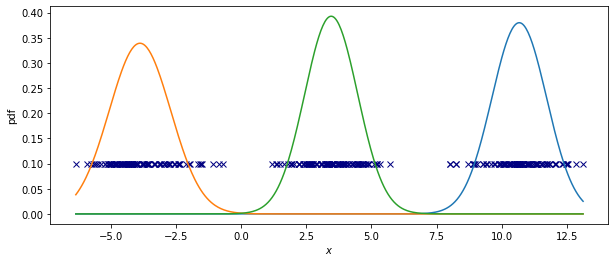

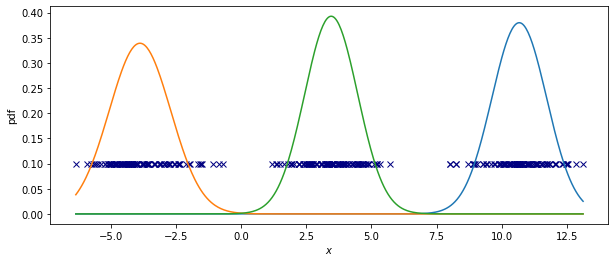

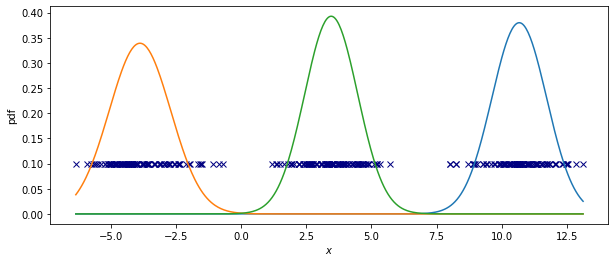

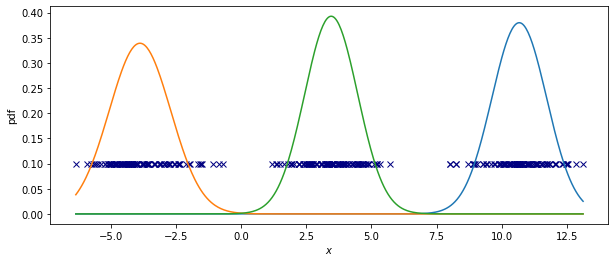

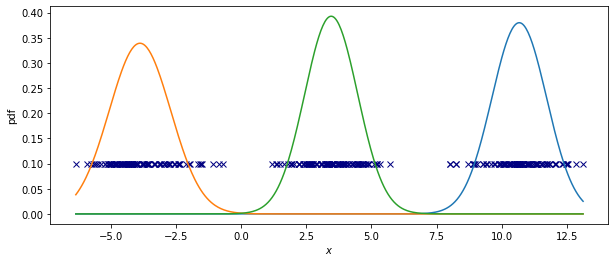

In [12]:
data = Data1D()
x = data.X
gmm=GaussianMixtureModel1D(x,3)
gmm.exp_maximize(20)